<a href="https://colab.research.google.com/github/hemanthreddy3741/hello-world/blob/master/custonSGDregressor_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -U ipykernel
!pip install chart_studio
!pip install plotly
!pip install "notebook>=5.3" "ipywidgets>=7.2"

     |████████████████████████████████| 122kB 3.5MB/s 
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.2.1 which is incompatible.
  Found existing installation: ipykernel 4.10.1
    Uninstalling ipykernel-4.10.1:
      Successfully uninstalled ipykernel-4.10.1


     |████████████████████████████████| 71kB 2.4MB/s 
     |████████████████████████████████| 9.7MB 3.4MB/s 
     |████████████████████████████████| 501kB 38.5MB/s 
  Created wheel for tornado: filename=tornado-6.0.4-cp36-cp36m-linux_x86_64.whl size=427640 sha256=28623897465d2f05c6d8662fda765ea78fa0e76e066c9af8381e704573615536
  Stored in directory: /root/.cache/pip/wheels/93/84/2f/409c7b2bb3afc3aa727f7ee8787975e0793f74d1165f4d0104
Successfully built tornado
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.2.1 which is incompatible.
ERROR: google-colab 1.0.0 has requirement notebook~=5.2.0, but you'll have notebook 6.0.3 which is incompatible.
  Found existing installation: tornado 4.5.3
    Uninstalling tornado-4.5.3:
      Successfully uninstalled tornado-4.5.3
  Found existing installation: notebook 5.2.2
    Uninstalling notebook-5.2.2:
      Successfully uninstalled notebook-5.2.2


In [0]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
import seaborn as sns
from chart_studio.plotly import plotly
from tqdm import tqdm
from sklearn.model_selection import train_test_split
%matplotlib inline


In [0]:
from sklearn.datasets import load_boston
boston = load_boston()
print( "Type of boston dataset:", type(boston))

Type of boston dataset: <class 'sklearn.utils.Bunch'>


##1. <class 'sklearn.utils.Bunch'> means the data here is stored in the form of extended dictionary and the keys here are the attributes

In [0]:
#we try to get the description of the boston dataset 
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [0]:
# Let's change the data to a Panda's Dataframe
boston_df = pd.DataFrame(boston['data'] )
boston_df.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [0]:
boston_df.shape

(506, 13)

In [0]:
#Now add the column names.
boston_df.columns = boston['feature_names']
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [0]:
#Add the target as PRICE. 
boston_df['PRICE']= boston['target']
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [0]:
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [0]:
boston_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [0]:
X=boston_df.copy()

In [0]:
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [0]:
X = boston_df.iloc[:,0:13]

In [0]:
y = boston_df['PRICE']
y.shape

(506,)

In [0]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [0]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(339, 13) (167, 13) (339,) (167,)


In [0]:
#here the data is of different units i.e, each feature is having different values we need to standardize the data 
#question:why you are doing the standarization and why not normalization 
#standarization helps in having an extra mile of understanding the data so as to get some more insights 
#normalization will be helping in fixing the range of all the values of thew attributes

In [0]:
from sklearn.preprocessing import StandardScaler
S = StandardScaler()
X_train = S.fit_transform(X_train)
X_test = S.transform(X_test)

In [0]:
print(X_train)

[[ 0.89624872 -0.51060139  0.98278223 ...  0.86442095  0.24040357
   0.77155612]
 [-0.34895881 -0.51060139 -0.44867555 ...  1.22118698  0.20852839
   0.32248963]
 [-0.41764058  0.03413008 -0.48748013 ... -1.36536677  0.43481957
   0.92775316]
 ...
 [-0.43451148  2.97567999 -1.32968321 ... -0.56264319  0.36745216
  -0.90756208]
 [ 1.01703049 -0.51060139  0.98278223 ...  0.86442095 -2.80977992
   1.50233514]
 [-0.40667333 -0.51060139 -0.38831288 ...  1.17659123 -3.25117205
  -0.26046005]]


In [0]:
print(X_train.shape[1])

13


In [0]:
print(X_train.shape)

(339, 13)


In [0]:
#firstly we need to find the line equation of the line that will be passing through the maximum #points in the dataset
#we need to find the y^(y_hat value)
#line equation:y=mx=c
#y_prediction=m(slope)*X(datapoint)+c(y-intercept)
#y_prediction=np.dot(m,X(i))+c


In [0]:
#with the give line equation we need to check if this is the best fit line from the SUM OF THE SQUARED ERRORS  of the dataset 
#we need to find the minimal value of the SQUARED ERROR with the optimal value of the slope(m) and y-intercept (c) belonging to the best fit line 


In [0]:
#The optimal slope and y-intercept are achived by the partial derivative of the the loss function 
#loss function=argmin(m,c) Σ(y(i)-y^(i))^2
#In simple terms loss function=argmin(m,c) Σ (actual - predicted)^2

In [0]:
#now lets take the gradient of the loss function w.r.t slope and the y-intercept

In [0]:
#as given in the assignment video 
#m_grad=m_grad + (-2)*X[i]*(y[i]-(y_prediction))
#c_grad=b_grad + (-2)*(y[i]-(y_prediction))
#we need to remember that the we need to run the gradient of the slope and y-intercept for every value of X 

In [0]:
#as this is a iterative process and we intialization of the slope and the y-intercept start with random values.
#to get the next closest slope and intercept value we will have a update function.
#this update function will decide the next slope and as well as for the y-intercept.
#new_intercept=old_intercept-learning_rate[c_grad]
#new_slope=old_slope-learning_rate[m_grad]
#here the learning_rate will decide how closer the next slope or intercept has to jump for their respective optimal values. 

In [0]:
#to avoid the oscillation of the new_slope and new_intercept we need to decrease the learning_rate for every iteration
#there is no rule that we need to decrease the learning rate to a certain value
#here we'll divide the learning rate by 2

In [0]:
#In SGD we will take k #points where 1<k<n
#from the old slope or intercept to reach the new slope or intercept, the update function will use different set of k 
#Here we consider k as batch_size

In [0]:
#we need to control the #iterations for the update fnction to run 

In [0]:
# now lets write the total function of the SGD 
def sgd(X,Y,learning_rate,iterations,k,decrease_lr):
#firstly we need to initialize the slope and y-intercept values
  m=np.random.randn(1,X.shape[1])#as we know that the boston dataset has around 13 attributes here we'll generate 13 random values for the slope
  c=np.random.randn(1,)
 #we generate a loop w.r.t to iterations value and end the loop after the mentioned iterations are done
  for iterations in range(1,iterations+1):
   #we need to create batches of the data 
   batch=X
   batch=pd.DataFrame(np.random.randn(k,X.shape[1]))

   #we need to initialize the m_grad and c_gead also 
   m_grad=np.random.randn(1,X.shape[1])
   c_grad=np.random.randn(1,)
   #now lets start the real algorithm here 
   for i in range(batch.shape[0]):
     y_prediction=np.dot(m,X[i])+c

     #here we are calculating the gradients
     m_grad=m_grad + (-2)*X[i]*(y[i]-(y_prediction))
     c_grad=c_grad + (-2)*(y[i]-(y_prediction))

     #we need to update the m_grad and c_grad now i.e, we are trying to get the next new slope and intercept from the above calculated gradients
     m=m-learning_rate*(m_grad)
     c=c-learning_rate*(c_grad)
     #here we have completed the algorithm
     #now we need to increment the iteration value 
     iterations=iterations+1
     #we need to decrease the learning_rate now
     learning_rate=learning_rate/decrease_lr
   return m,c      
    


In [0]:
m,c=sgd(X_train,y_train,0.1,500,10,2)
print(m)
print(c)

[[ 6.35646116 -7.57475245  1.40416929 -5.41000459  1.82003422 -4.71453443
  14.78932463 -0.98886753 11.49365863  6.98996974  5.92650958  3.73103193
  10.94709022]]
[18.82796657]


In [0]:
#here this function is created so that we can have the prediction for the test values  
def prediction(x,m,c):
    y_prediction=[]
    for i in range(len(x)):
        y=np.asscalar(np.dot(m,x[i])+c)#here we are converting each of the x-values to the scalar
        y_prediction.append(y)
    return np.array(y_prediction)
    

In [0]:
m,c=sgd(X_train,y_train,0.001,100,35,1)
y_test_prediction=prediction(X_test,m,c)

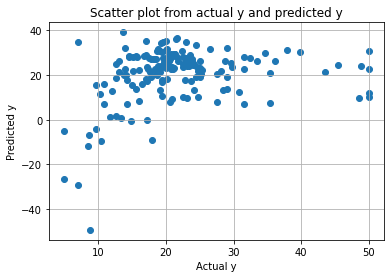

In [0]:
plt.scatter(y_test,y_test_prediction)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()

In [0]:
from sklearn.metrics import mean_squared_error
mean_sqerror1 = mean_squared_error(y_test,y_test_prediction)
print("Mean squared error",mean_sqerror1)

Mean squared error 170.53745568014236


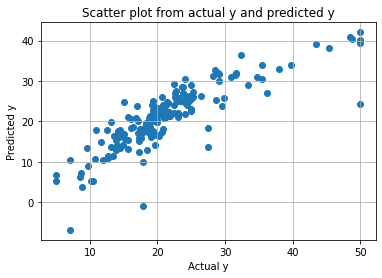

In [0]:
#now we need to try the sklearn sgdRegressor
from sklearn.linear_model import SGDRegressor
SGD = SGDRegressor(loss='squared_loss', max_iter=500)
SGD.fit(X_train,y_train)
y_TEST_prediction = SGD.predict(X_test)
plt.scatter(y_test,y_TEST_prediction)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()

In [0]:
mean_sqerror2 = mean_squared_error(y_test,y_TEST_prediction)
print("Mean squared error",mean_sqerror2)

Mean squared error 21.36828587616543


In [0]:
#here we have the best fit weights of the sgd regressor built from scratch
bestfit_weights=pd.DataFrame(m)
bestfit_weights=bestfit_weights.T
bestfit_weights.columns=['SGD_prototype']
print(bestfit_weights)

    SGD_prototype
0       -5.944330
1       -3.858330
2        1.807469
3        1.909172
4       -2.414916
5        0.726168
6        2.627293
7       -1.169619
8       -3.121640
9        2.259493
10       0.586885
11       4.627698
12      -1.560778


In [0]:
#here we have the best weights of the sklearn's sgd regressor
bestfit_weights2=pd.DataFrame(SGD.coef_)
bestfit_weights2.columns=['SGD_sklearn']
print(bestfit_weights2)

    SGD_sklearn
0     -0.929038
1      0.719649
2      0.157771
3      0.900420
4     -1.699785
5      2.884076
6     -0.407370
7     -2.845391
8      1.365543
9     -0.773461
10    -2.056410
11     1.052992
12    -3.943026


In [0]:
table=pd.concat([bestfit_weights,bestfit_weights2], axis=1, sort=False)

In [0]:
print(table)

    SGD_prototype  SGD_sklearn
0       -5.944330    -0.929038
1       -3.858330     0.719649
2        1.807469     0.157771
3        1.909172     0.900420
4       -2.414916    -1.699785
5        0.726168     2.884076
6        2.627293    -0.407370
7       -1.169619    -2.845391
8       -3.121640     1.365543
9        2.259493    -0.773461
10       0.586885    -2.056410
11       4.627698     1.052992
12      -1.560778    -3.943026


In [0]:
print("mean square error of the sgd_prototype",mean_sqerror1)
print("mean square error of the sgd_sklearn",mean_sqerror2)

mean square error of the sgd_prototype 170.53745568014236
mean square error of the sgd_sklearn 21.36828587616543
